
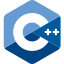
<br>

<div style="text-align:center; font-size:200%;">
  <b>GoF: Strategy Pattern</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 03 GoF Strategy Pattern.ipynb -->
<!-- slides/module_450_design_patterns/topic_200_strategy.cpp -->


### Intent

- Interchangeable algorithms / interchangeable behaviors
- Algorithms independent of classes that use them


### Also known as

Policy


### Motivation

- We want to display a text in a field with limited width
- There are different possibilities for this:
  - Truncation after a certain number of characters (with/without ellipsis)
  - Line break after a certain number of characters
    - Line break in the middle of a word
    - Line break at spaces (greedy/dynamic programming)


## Structure

<img src="img/pat_strategy.svg"
     style="display:block;margin:auto;width:80%"/>


## Participants
- `Strategy`
  - Common interface for all supported algorithms
- `ConcreteStrategy`
  - implements the algorithm
- `Context`
  - is configured with a `ConcreteStrategy` object
  - knows its `Strategy` object
  - optional: interface that allows strategies to access the context data

In [ ]:
#include <iostream>

In [ ]:
class Strategy {
public:
    virtual ~Strategy() = default;

    virtual float AlgorithmInterface() = 0;
};

In [ ]:
#include <memory>

In [ ]:
class Context{
public:
    Context(std::unique_ptr<Strategy> strategy) : strategy_(std::move(strategy)) {}

    float ContextInterface() { return strategy_->AlgorithmInterface(); }

    void SetStrategy(std::unique_ptr<Strategy> strategy) {
        strategy_ = std::move(strategy);
    }

private:
    std::unique_ptr<Strategy> strategy_;
};

In [ ]:
class ConcreteStrategyA : public Strategy {
public:
    float AlgorithmInterface() override {
        return 1.5;
    }
};

In [ ]:
class ConcreteStrategyB : public Strategy {
public:
    float AlgorithmInterface() override {
        return 2.0;
    }
};

In [ ]:
Context context{std::make_unique<ConcreteStrategyA>()};

In [ ]:
std::cout << "Strategy A: " << context.ContextInterface() << "\n";

In [ ]:
context.SetStrategy(std::make_unique<ConcreteStrategyB>());

In [ ]:
std::cout << "Strategy B: " << context.ContextInterface() << "\n";


### Collaborations

- Strategy and Context interact to implement the chosen algorithm
  - Context can pass data to strategy
  - Context can pass itself to strategy
- A context forwards requests from its clients to its strategy [...]


### Implementation

- `ConcreteStrategy` requires efficient access to all required data
- ...


## Example Code: Text Wrapping for a Blog

In [ ]:
class TextWrapStrategy {
public:
    TextWrapStrategy() = default;
    virtual ~TextWrapStrategy() = default;

    virtual std::vector<std::string> Wrap(const std::string& text, int width) = 0;
};

In [ ]:
class TruncationStrategy : public TextWrapStrategy {
public:
    std::vector<std::string> Wrap(const std::string& text, int width) override {
        if (text.size() <= width) {
            return {text};
        }
        return {text.substr(0, width - 3) + "..."};
    }
};

In [ ]:
class BreakAnywhereStrategy : public TextWrapStrategy {
public:
    std::vector<std::string> Wrap(const std::string& text, int width) override {
        std::string remainingText{text};
        std::vector<std::string> lines;
        while (remainingText.size() > width) {
            lines.push_back(remainingText.substr(0, width));
            remainingText = remainingText.substr(width);
        }
        lines.push_back(remainingText);
        return lines;
    }
};

In [ ]:
class BreakOnSpaceStrategy : public TextWrapStrategy {
public:
    std::vector<std::string> Wrap(const std::string& text, int width) override {
        std::vector<std::string> lines;
        std::string remainingText{text};
        while (remainingText.size() > width) {
            auto pos = remainingText.find_last_of(' ', width);
            if (pos == std::string::npos) {
                pos = width;
            }
            lines.push_back(remainingText.substr(0, pos));
            remainingText = remainingText.substr(pos + 1);
        }
        lines.push_back(remainingText);
        return lines;
    }
};

In [ ]:
class BlogPost {
public:
    BlogPost(
        const std::string& author, const std::string& title, const std::string& text)
        : author_{author}, title_{title}, text_{text} {}

    const std::string& GetAuthor() const { return author_; }
    const std::string& GetTitle() const { return title_; }
    const std::string& GetText() const { return text_; }

private:
    std::string author_;
    std::string title_;
    std::string text_;
};

In [ ]:
class Blog {
public:
    Blog(std::unique_ptr<TextWrapStrategy> strategy) : strategy_{std::move(strategy)} {}

    void Print(int width) {
        for (const auto& post : posts_) {
            std::cout << std::string(width, '-') << "\n";
            std::cout << "Title: " << post.GetTitle() << "\n";
            std::cout << "Author: " << post.GetAuthor() << "\n";
            for (const auto& line : strategy_->Wrap(post.GetText(), width)) {
                std::cout << line << "\n";
            }
            std::cout << std::string(width, '-') << "\n";
        }
    }

    void AddPost(const BlogPost& post) { posts_.push_back(post); }

    void SetStrategy(std::unique_ptr<TextWrapStrategy> strategy) {
        strategy_ = std::move(strategy);
    }

private:
    std::vector<BlogPost> posts_;
    std::unique_ptr<TextWrapStrategy> strategy_;
};

In [ ]:
std::string firstPost{"This is my first post. This is my first post. This is my first "
                      "post. This is my first post. This is my first post. This is my "
                      "first post. This is my first post. This is my first post. "};
std::string secondPost{
    "This is my second post. This is my second post. This is my second post. This is "
    "my second post. This is my second post. This is my second post. This is my second "
    "post. This is my second post. This is my second post. This is my second post. "
    "This is my second post. This is my second post. "}

In [ ]:
Blog blog{std::make_unique<TruncationStrategy>()};

In [ ]:
blog.AddPost({"John Doe", "My first post", firstPost});
blog.AddPost({"Jane Doe", "My second post", secondPost});

In [ ]:
blog.Print(40);

In [ ]:
blog.SetStrategy(std::make_unique<BreakAnywhereStrategy>());

In [ ]:
blog.Print(40);

In [ ]:
blog.SetStrategy(std::make_unique<BreakOnSpaceStrategy>());

In [ ]:
blog.Print(40);


### Applicability

- Configuration of objects with one of several behaviors
- Different variants of an algorithm
- Encapsulate data with algorithm (client does not need to know data)
- Avoid conditional statements to select an algorithm


### Consequences

- Families of reusable, related algorithms
- Alternative to inheritance
- Selection of a strategy without conditional statements
- Context/Clients must know the possible strategies
- Communication overhead between strategy and context
- Increased number of objects


### C++ Implementation Tip

In C++ the Strategy Pattern can often be implemented simply by storing a function
object as member:

In [ ]:
class FunBlog {
public:
    using Strategy = std::function<std::vector<std::string>(const std::string&, int)>;

    FunBlog(Strategy strategy) : strategy_{std::move(strategy)} {}

    void Print(int width) {
        for (const auto& post : posts_) {
            std::cout << std::string(width, '-') << "\n";
            std::cout << "Title: " << post.GetTitle() << "\n";
            std::cout << "Author: " << post.GetAuthor() << "\n";
            for (const auto& line : strategy_(post.GetText(), width)) {
                std::cout << line << "\n";
            }
            std::cout << std::string(width, '-') << "\n";
        }
    }

    void AddPost(const BlogPost& post) { posts_.push_back(post); }
    void SetStrategy(Strategy strategy) { strategy_ = std::move(strategy); }

private:
    std::vector<BlogPost> posts_;
    Strategy strategy_;
};

In [ ]:
std::vector<std::string> TruncateLines(const std::string& text, int width) {
    if (text.size() <= width) {
        return {text};
    }
    return {text.substr(0, width - 3) + "..."};
}


- Here we have defined a function `TruncateLines()` that has the same
  functionality as our `TruncationStrategy`

In [ ]:
FunBlog blog{TruncateLines};

In [ ]:
blog.AddPost({"John Doe", "My first post", firstPost});
blog.AddPost({"Jane Doe", "My second post", secondPost});

In [ ]:
blog.Print(40);

In [ ]:
#include <algorithm>

In [ ]:
blog.SetStrategy(
    [](const std::string& text, int width) -> std::vector<std::string> {
        if (text.size() <= width) {
            return {text};
        }
        return {text.substr(0, width - 3) + "..."};
    });

In [ ]:
blog.Print(40);


## Mini-workshop: Predictions

You want to write a system that can make predictions for stock prices.
To do this, write a class `Predictor` with a method

```cpp
virtual float Predict(const std::vector<float>& values) const
```

Use the Strategy Pattern to allow at least two different prediction variants:

- predict the mean of all values in `values`
- predict the last value in `values` (or 0 if `values` is empty)

Test your implementation with some sample data.

In [ ]:
class PredictionStrategy {
public:
    PredictionStrategy() = default;
    virtual ~PredictionStrategy() = default;

    virtual float Predict(const std::vector<float>& values) const = 0;

}

In [ ]:
class LastValueStrategy : public PredictionStrategy {
    float Predict(const std::vector<float>& values) const override {
        return values.empty() ? 0.0 : values.back();
    }
}

In [ ]:
class MeanValueStrategy : public PredictionStrategy {
    float Predict(const std::vector<float>& values) const override {
        return std::accumulate(values.begin(), values.end(), 0.0) / values.size();
    }
}

In [ ]:
class Predictor {
public:
    Predictor(std::unique_ptr<PredictionStrategy> strategy)
        : strategy_{std::move(strategy)} {}

    float Predict(const std::vector<float>& values) const {
        return strategy_->Predict(values);
    }

    void SetStrategy(std::unique_ptr<PredictionStrategy> strategy) {
        strategy_ = std::move(strategy);
    }

private:
    std::unique_ptr<PredictionStrategy> strategy_;
}

In [ ]:
Predictor p{std::make_unique<MeanValueStrategy>()};
std::vector<float> values{1.0, 2.0, 3.0};

In [ ]:
std::cout << "Default prediction: " << p.Predict(values) << "\n";

In [ ]:
p.SetStrategy(std::make_unique<LastValueStrategy>());
std::cout << "Last value prediction: " << p.Predict(values) << "\n";

In [ ]:
p.SetStrategy(std::make_unique<MeanValueStrategy>());
std::cout << "Mean value prediction: " << p.Predict(values) << "\n";

In [ ]:
float Mean(const std::vector<float>& values) {
    return std::accumulate(values.begin(), values.end(), 0.0) / values.size();
}

In [ ]:
class PredictorFun {
public:
    PredictorFun(std::function<float(const std::vector<float>&)> strategy = Mean)
        : strategy_{std::move(strategy)} {}

    float predict(const std::vector<float>& values) const { return strategy_(values); }

    void SetStrategy(std::function<float(const std::vector<float>&)> strategy) {
        strategy_ = std::move(strategy);
    }

private:
    std::function<float(const std::vector<float>&)> strategy_;
}

In [ ]:
PredictorFun p;
std::vector<float> my_values{1.0, 2.0, 3.0};

In [ ]:
std::cout << "Default prediction: " << p.predict(my_values) << "\n";

In [ ]:
p.SetStrategy([](const std::vector<float>& values) {
    return values.empty() ? 0.0 : values.back();
});
std::cout << "Last value prediction: " << p.predict(my_values) << "\n";

In [ ]:
p.SetStrategy(Mean);
std::cout << "Mean value prediction: " << p.predict(my_values) << "\n";